PLEASE COMMENT SUGGESTIONS AFTER PANDAS TO MOVE AHEAD

In [1]:
# Reading the csv file into the dataframe
df = spark.read.csv("inpc.csv", header='true', inferSchema='true')
df.show(5)

+---------+---------+------+---------+----------------+-------------------+------+-------------------+-----------+-------------------+-------------------+---------+-------------------+-------+--------------+-------------------+------------+-------------------+----------------------+---------------------+---------------------+---------------------+-------------------+---------------+
|person_id|INDEX_AGE|GENDER|ETHNICITY|            RACE|         BIRTH_DATE|diagRL|         F_T2D_Diag|F_GEST_Diag|         F_T1D_Diag|         F_CVD_Diag|F_LD_Diag|          F_KD_Diag|HBA1Cct|Ct_AlzDiagCode|       F_AlzDiagDay|S_AlzDiagDay|       L_AlzDiagDay|Ct_AlzDementiaDiagCode|F_AlzDementia_DiagDay|S_AlzDementia_DiagDay|L_AlzDementia_DiagDay|       F_Neuro_Diag|F_NeuroDiag_Age|
+---------+---------+------+---------+----------------+-------------------+------+-------------------+-----------+-------------------+-------------------+---------+-------------------+-------+--------------+-------------------+-

In [2]:
# Printing the schema of the dataset
df.printSchema()

root
 |-- person_id: integer (nullable = true)
 |-- INDEX_AGE: integer (nullable = true)
 |-- GENDER: string (nullable = true)
 |-- ETHNICITY: string (nullable = true)
 |-- RACE: string (nullable = true)
 |-- BIRTH_DATE: timestamp (nullable = true)
 |-- diagRL: double (nullable = true)
 |-- F_T2D_Diag: timestamp (nullable = true)
 |-- F_GEST_Diag: timestamp (nullable = true)
 |-- F_T1D_Diag: timestamp (nullable = true)
 |-- F_CVD_Diag: timestamp (nullable = true)
 |-- F_LD_Diag: timestamp (nullable = true)
 |-- F_KD_Diag: timestamp (nullable = true)
 |-- HBA1Cct: integer (nullable = true)
 |-- Ct_AlzDiagCode: integer (nullable = true)
 |-- F_AlzDiagDay: timestamp (nullable = true)
 |-- S_AlzDiagDay: timestamp (nullable = true)
 |-- L_AlzDiagDay: timestamp (nullable = true)
 |-- Ct_AlzDementiaDiagCode: integer (nullable = true)
 |-- F_AlzDementia_DiagDay: timestamp (nullable = true)
 |-- S_AlzDementia_DiagDay: timestamp (nullable = true)
 |-- L_AlzDementia_DiagDay: timestamp (nullable =

In [3]:
df_temp=df.select("person_id","GENDER","RACE","BIRTH_DATE","F_T2D_Diag","F_AlzDiagDay","F_AlzDementia_DiagDay")
df_temp.show()

+---------+------+----------------+-------------------+-------------------+-------------------+---------------------+
|person_id|GENDER|            RACE|         BIRTH_DATE|         F_T2D_Diag|       F_AlzDiagDay|F_AlzDementia_DiagDay|
+---------+------+----------------+-------------------+-------------------+-------------------+---------------------+
|     1238|     F|african_american|1950-10-06 00:00:00|2001-04-07 00:00:00|               null|  2017-04-14 00:00:00|
|     1342|     F|african_american|1920-04-19 00:00:00|1997-11-03 00:00:00|2016-10-28 00:00:00|  2011-06-25 00:00:00|
|     1645|     M|african_american|1928-05-07 00:00:00|1999-12-21 00:00:00|               null|  2011-07-13 00:00:00|
|     2366|     F|african_american|1948-10-29 00:00:00|1996-06-19 00:00:00|               null|  2009-09-12 00:00:00|
|     2659|     M|           white|1926-12-31 00:00:00|2003-04-23 00:00:00|               null|  2012-03-16 00:00:00|
|     3918|     F|african_american|1942-03-31 00:00:00| 

In [5]:
df_temp.count()

50392

In [24]:
df_temp.groupby(["GENDER"]).count().show()

+------+-----+
|GENDER|count|
+------+-----+
|     F|29649|
|     M|20740|
|     U|    3|
+------+-----+



COUNTING FOR TYPE 2 DIABETES

In [13]:
df_temp.filter(df_temp.F_T2D_Diag. isNotNull()).count()

43558

In [14]:
df_temp.filter(df_temp.F_T2D_Diag. isNotNull()).groupby(["GENDER"]).count().show()

+------+-----+
|GENDER|count|
+------+-----+
|     F|25697|
|     M|17858|
|     U|    3|
+------+-----+



COUNTING FOR ALZHEIMER'S DISEASE

In [16]:
df_temp.filter(df_temp.F_AlzDiagDay.isNotNull()).count()

5340

In [18]:
df_temp.filter(df_temp.F_AlzDiagDay. isNotNull()).groupby(["GENDER"]).count().show()

+------+-----+
|GENDER|count|
+------+-----+
|     F| 3309|
|     M| 2031|
+------+-----+



COUNTING FOR ALZHEIMER'S DISEASE WITH DEMENTIA

In [19]:
df_temp.filter(df_temp.F_AlzDementia_DiagDay.isNotNull()).count()

49482

In [20]:
df_temp.filter(df_temp.F_AlzDementia_DiagDay. isNotNull()).groupby(["GENDER"]).count().show()

+------+-----+
|GENDER|count|
+------+-----+
|     F|29086|
|     M|20393|
|     U|    3|
+------+-----+



In [76]:
#count row and column
def shape(self):
    return (self.count(), len(self.columns))
shape(df)

(50392, 29)

In [77]:
from pyspark.sql.functions import rank, col, unix_timestamp, from_unixtime, to_timestamp
from pyspark.sql import functions as F
timeFmt = "yyyy-MM-dd"

#Age of T2D diagnosed:
age_of_T2D_diag = F.round((unix_timestamp('F_T2D_Diag', "yyyy-MM-dd HH:mm:ss") - unix_timestamp('BIRTH_DATE', "yyyy-MM-dd HH:mm:ss"))/(365*60*60*24), 2)
df = df.withColumn("Age_T2D_Diag", age_of_T2D_diag)
 
#year of alzheimer's diagnosed:
year_of_ad_diag = F.round((unix_timestamp('S_AlzDiagDay', "yyyy-MM-dd HH:mm:ss") - unix_timestamp('F_AlzDiagDay', "yyyy-MM-dd HH:mm:ss"))/(365*60*60*24), 2)
df = df.withColumn("Year_AD_Diag", year_of_ad_diag)

#year of alzheimer with dementia diagnosed:
Year_AD_Dem_Diag =F.round((unix_timestamp('S_AlzDementia_DiagDay', "yyyy-MM-dd HH:mm:ss") - unix_timestamp('F_AlzDementia_DiagDay', "yyyy-MM-dd HH:mm:ss"))/(365*60*60*24), 2)
df = df.withColumn("Year_AD_Dem_Diag", Year_AD_Dem_Diag)

#Age of alzheimer diagnosed:
age_of_ad_diag = F.round((unix_timestamp('F_AlzDiagDay', "yyyy-MM-dd HH:mm:ss") - unix_timestamp('BIRTH_DATE', "yyyy-MM-dd HH:mm:ss"))/(365*60*60*24), 2)
df = df.withColumn("Age_AD_Diag", age_of_ad_diag)
 
#Age of alzheimer with dementia diagnosed:
age_of_ad_with_dm_diag = F.round((unix_timestamp('F_AlzDementia_DiagDay', "yyyy-MM-dd HH:mm:ss") - unix_timestamp('BIRTH_DATE', "yyyy-MM-dd HH:mm:ss"))/(365*60*60*24), 2)
df = df.withColumn("Age_AD_Dem_Diag", age_of_ad_with_dm_diag)

In [78]:
#No AD at all
no_ad_diag=df.where(col("F_AlzDiagDay").isNotNull()).count()
print("Number of people with no Alzheimers at all",no_ad_diag)


Number of people with no Alzheimers at all 5340


In [79]:
#Total diagnosed with alzheimer
all_ad_diag=df.where(col("F_AlzDiagDay").isNull()).count()
print("Number of people with Alzheimers",all_ad_diag)

Number of people with Alzheimers 45052


In [80]:
#Total diagnosed with T2D
all_T2D_diag=df.where(col("F_T2D_Diag").isNull()).count()
print("Number of people with T2D",all_T2D_diag)

Number of people with T2D 6834


In [81]:
df1=df.select("GENDER","Age_T2D_Diag","Age_AD_Diag","Age_AD_Dem_Diag")

In [87]:
#removing null values
#df_new=df1.na.drop()

In [82]:
df1.show()

+------+------------+-----------+---------------+
|GENDER|Age_T2D_Diag|Age_AD_Diag|Age_AD_Dem_Diag|
+------+------------+-----------+---------------+
|     F|       50.54|       null|          66.57|
|     F|       77.59|      96.59|          91.24|
|     M|       71.67|       null|          83.24|
|     F|       47.67|       null|          60.91|
|     M|       76.36|       null|          85.27|
|     F|        null|       null|           74.9|
|     M|       60.28|       null|          74.66|
|     F|       89.31|       null|          89.03|
|     F|        76.3|       null|          78.06|
|     F|       48.28|       null|          56.01|
|     F|       63.47|      72.67|          72.62|
|     M|       31.22|       null|          23.94|
|     M|        null|       null|          78.07|
|     F|       42.24|       null|          48.03|
|     M|       53.85|       null|          59.54|
|     F|       50.25|       null|          57.31|
|     F|       87.31|       null|          88.43|


In [83]:
pd_new=df1.toPandas()

In [84]:
pd_new

,GENDER,Age_T2D_Diag,Age_AD_Diag,Age_AD_Dem_Diag
0,F,50.54,NaN,66.57
1,F,77.59,96.59,91.24
2,M,71.67,NaN,83.24
3,F,47.67,NaN,60.91
4,M,76.36,NaN,85.27
...,...,...,...,...
50387,F,NaN,NaN,33.84
50388,M,NaN,NaN,69.64
50389,M,NaN,NaN,82.22
50390,F,NaN,NaN,76.15


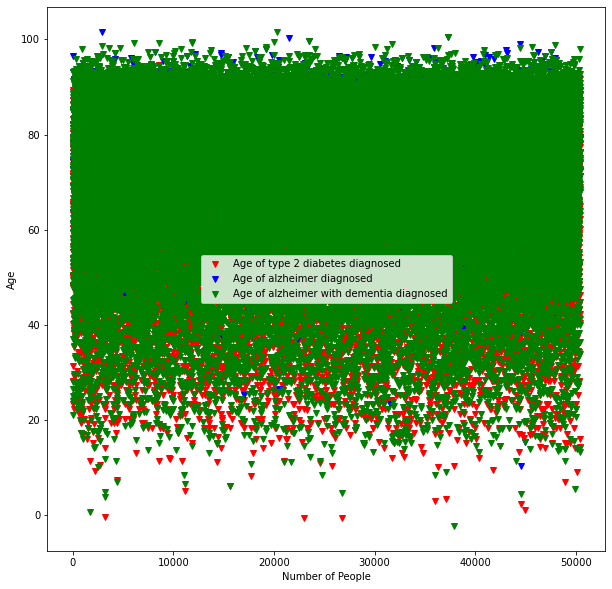

In [87]:
import numpy as np       
from matplotlib import pylab
import matplotlib.pyplot as plt   
fig, ax=plt.subplots(figsize=(10,10))
ax.plot(pd_new.index,pd_new['Age_T2D_Diag'],marker='v',linestyle='None',color='r',label='Age of type 2 diabetes diagnosed')
ax.plot(pd_new.index,pd_new['Age_AD_Diag'],marker='v',linestyle='None',color='b',label='Age of alzheimer diagnosed')
ax.plot(pd_new.index,pd_new['Age_AD_Dem_Diag'],marker='v',linestyle='None',color='g',label='Age of alzheimer with dementia diagnosed')

plt.legend(loc="center")
ax.set_xlabel("Number of People")
ax.set_ylabel("Age")

plt.show()

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

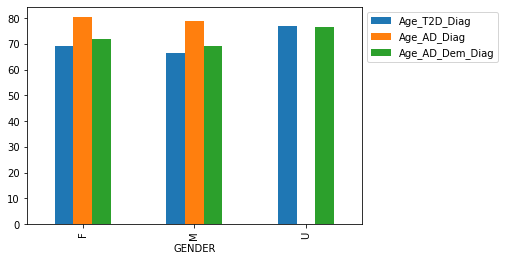

In [88]:
pd_new.groupby('GENDER').mean().plot(kind='bar').legend(bbox_to_anchor=(1.0, 1.0))

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7CB403B80>]],
      dtype=object)

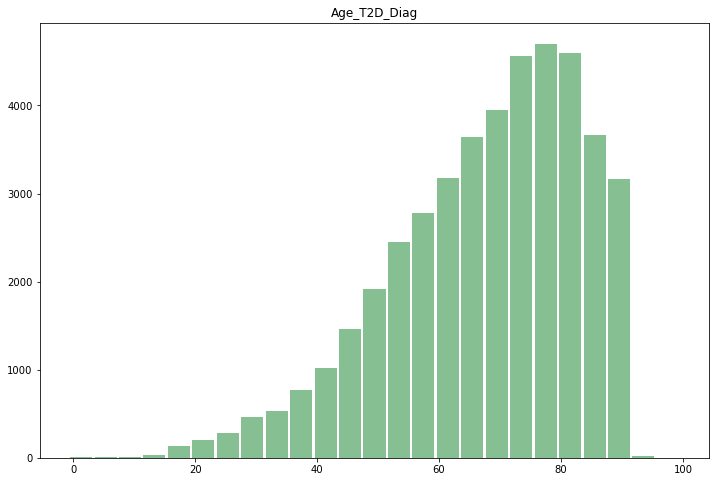

In [89]:
pd_new.hist(column='Age_T2D_Diag', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7CB430A00>]],
      dtype=object)

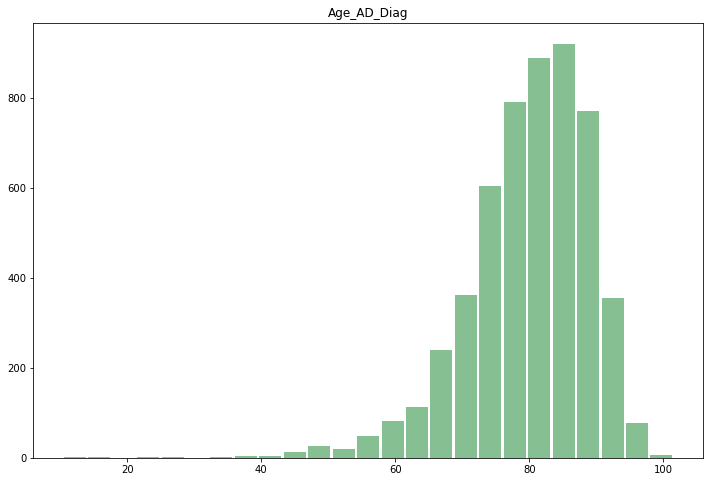

In [49]:
pd_new.hist(column='Age_AD_Diag', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B7CB152850>]],
      dtype=object)

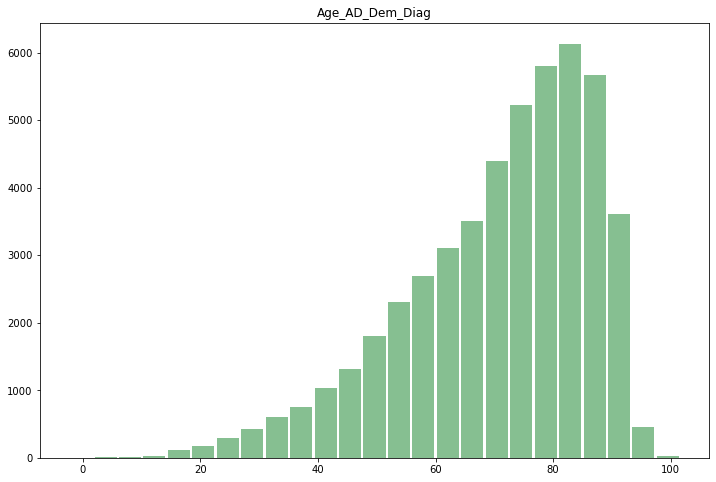

In [50]:
pd_new.hist(column='Age_AD_Dem_Diag', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

In [65]:
#Date of First AD diagnosed vs gender by removing null values
F_AD_df=df[['GENDER', 'F_AlzDiagDay']] 
F_AD_df_new=F_AD_df.na.drop()
F_AD_df_new.show()


+------+-------------------+
|GENDER|       F_AlzDiagDay|
+------+-------------------+
|     F|2016-10-28 00:00:00|
|     F|2013-01-05 00:00:00|
|     F|2015-12-29 00:00:00|
|     M|2016-03-31 00:00:00|
|     M|2018-08-09 00:00:00|
|     M|2017-04-30 00:00:00|
|     M|2016-11-10 00:00:00|
|     M|2016-02-08 00:00:00|
|     M|2017-10-20 00:00:00|
|     F|2016-01-23 00:00:00|
|     M|2016-09-25 22:44:00|
|     F|2016-09-20 00:00:00|
|     F|2017-09-20 00:01:00|
|     M|2016-12-29 00:00:00|
|     M|2019-01-28 08:33:55|
|     F|2015-01-16 00:00:00|
|     F|2009-03-19 00:00:00|
|     F|2014-12-16 00:00:00|
|     F|2014-12-05 00:00:00|
|     F|2009-02-25 00:00:00|
+------+-------------------+
only showing top 20 rows



In [66]:
#total number F_AD diagnosed
F_AD_df_new.count()

5340

In [67]:
#counting by male and female
F_AD_df_new.groupby(["GENDER"]).count().show()

+------+-----+
|GENDER|count|
+------+-----+
|     F| 3309|
|     M| 2031|
+------+-----+



In [68]:
#Age of AD diagnosed vs gender by removing null values
Age_AD_df=df[['GENDER', 'Age_AD_Diag']] 
Age_AD_df_new=Age_AD_df.na.drop()
Age_AD_df_new.show()

+------+-----------+
|GENDER|Age_AD_Diag|
+------+-----------+
|     F|      96.59|
|     F|      72.67|
|     F|      72.83|
|     M|      74.39|
|     M|      82.28|
|     M|      74.43|
|     M|      84.97|
|     M|      79.58|
|     M|      63.62|
|     F|      93.07|
|     M|      78.25|
|     F|      68.54|
|     F|      91.67|
|     M|      88.35|
|     M|       73.1|
|     F|      76.02|
|     F|      77.71|
|     F|      61.55|
|     F|      88.58|
|     F|      78.69|
+------+-----------+
only showing top 20 rows



In [69]:
#total number of Age of AD diagnosed
Age_AD_df_new.count()


5340

In [70]:
#counting by male and female
Age_AD_df_new.groupby(["GENDER"]).count().show()

+------+-----+
|GENDER|count|
+------+-----+
|     F| 3309|
|     M| 2031|
+------+-----+



In [71]:
#Age of AD with Dem diagnosed vs gender by removing null values
Age_AD_Dem_df=df1[['GENDER', 'Age_AD_Dem_Diag']] 
Age_AD_Dem_df_new=Age_AD_Dem_df.na.drop()
Age_AD_Dem_df_new.show()

+------+---------------+
|GENDER|Age_AD_Dem_Diag|
+------+---------------+
|     F|          66.57|
|     F|          91.24|
|     M|          83.24|
|     F|          60.91|
|     M|          85.27|
|     F|           74.9|
|     M|          74.66|
|     F|          89.03|
|     F|          78.06|
|     F|          56.01|
|     F|          72.62|
|     M|          23.94|
|     M|          78.07|
|     F|          48.03|
|     M|          59.54|
|     F|          57.31|
|     F|          88.43|
|     F|          77.44|
|     F|          61.36|
|     F|          68.99|
+------+---------------+
only showing top 20 rows



In [72]:
#total number of Age of AD with Dem diagnosed
Age_AD_Dem_df_new.count()


49482

In [73]:
#counting by male and female
Age_AD_Dem_df_new.groupby(["GENDER"]).count().show()

+------+-----+
|GENDER|count|
+------+-----+
|     F|29086|
|     M|20393|
|     U|    3|
+------+-----+

